# Librerías a emplear

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx

# Inputs

Los resultados deben venir en el siguiente formato:

$$e = [[x_1,y_1,z_1], [x_2,y_2,z_2],...]$$

donde $[x_n,y_n,z_n]$ corresponden a los resultados del n-ésimo estado. 

¿En qué orden deben venir los estados? Ordenados alfabéticamente. 

In [8]:
e = [
    [1, 0, 0], [0.5, 0.2, 0.3], [0.2, 0.6, 0.2], [0.1, 0.7, 0.2], [0.4, 0.3, 0.3],
    [0.3, 0.5, 0.2], [0.5, 0.4, 0.1], [0.6, 0.2, 0.2], [0.3, 0.3, 0.4], [0.4, 0.2, 0.4],
    [0.7, 0.2, 0.1], [0.5, 0.3, 0.2], [0.2, 0.4, 0.4], [0.6, 0.1, 0.3], [0.3, 0.6, 0.1],
    [0.2, 0.7, 0.1], [0.5, 0.2, 0.3], [0.3, 0.4, 0.3], [0.4, 0.3, 0.3], [0.6, 0.2, 0.2],
    [0.2, 0.5, 0.3], [0.3, 0.3, 0.4], [0.4, 0.5, 0.1], [0.3, 0.6, 0.1], [0.2, 0.3, 0.5],
    [0.4, 0.3, 0.3], [0.3, 0.2, 0.5], [0.5, 0.2, 0.3], [0.4, 0.3, 0.3], [0.3, 0.4, 0.3],
    [0.2, 0.6, 0.2], [0.4, 0.2, 0.4]
]

Estados

In [9]:
states = [
    "Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Chiapas", "Chihuahua",
    "Ciudad de México", "Coahuila de Zaragoza", "Colima", "Durango", "México", "Guanajuato", "Guerrero", "Hidalgo",
    "Jalisco", "Michoacán de Ocampo", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla", "Querétaro", "Quintana Roo",
    "San Luis Potosí", "Sinaloa", "Sonora", "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz de Ignacio de la Llave", "Yucatán", "Zacatecas"
]

Colores

In [10]:
party_colors = {'MORENA': '#800000', 'PRIAN': '#0000FF', 'OTROS': '#FFA500'}

Debemos conseguir los siguientes archivos en el siguiente enlace: https://www.inegi.org.mx/app/mapas/

In [11]:
shapefile_path = 'mexican-states-master/mexican-states.shp'
gdf = gpd.read_file(shapefile_path)
state_name_column = 'name'

Basándonos en la lista e, los resultados del modelo, definimos el ganador por estado

In [12]:
winners = []
for votes in e:
    max_vote_index = votes.index(max(votes))
    if max_vote_index == 0:
        winners.append('MORENA')
    elif max_vote_index == 1:
        winners.append('PRIAN')
    else:
        winners.append('OTROS')
gdf['winner'] = gdf[state_name_column].map(dict(zip(states, winners)))

# Graficar resultados

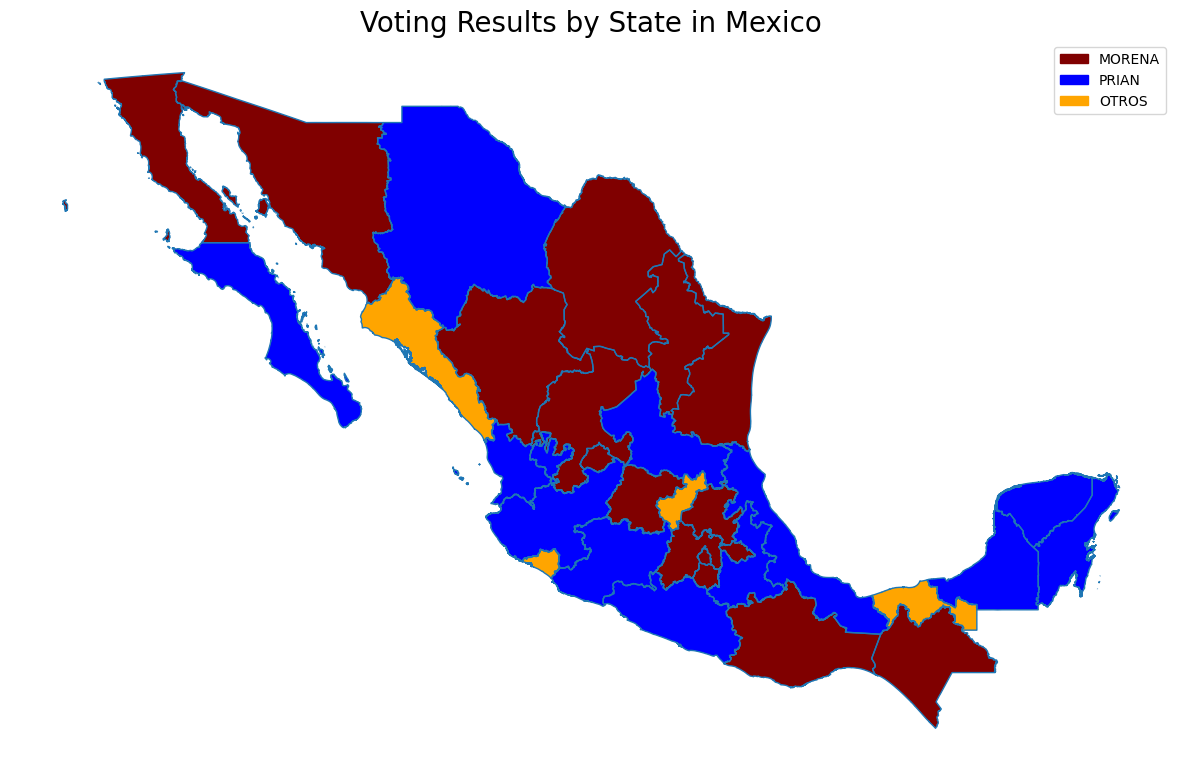

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.boundary.plot(ax=ax, linewidth=1)

# Asociar color con partido ganador
for key, value in party_colors.items():
    subset = gdf[gdf['winner'] == key]
    subset.plot(ax=ax, color=value, label=key)
# Labels
legend_elements = [mpatches.Patch(color='#800000', label='MORENA'),
                   mpatches.Patch(color='#0000FF', label='PRIAN'),
                   mpatches.Patch(color='#FFA500', label='OTROS')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
# Título
ax.set_title('Voting Results by State in Mexico', fontsize=20)
# Quitar-Poner ejes
ax.axis('off')
plt.show()